Q.Use Movielens dataset to create a content-based recommendation system. You can use Genre and Tags.

● Visualize the data using plots and draw insights from the trends occurring in the dataset.

● Generate user recommendations based on its watch history.

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [ ]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
import pandas as pd

# Read CSV files into DataFrames
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

# Merge DataFrames on 'movieId' column
merged_df = pd.merge(movies, links, on='movieId', how='outer')\
                .merge(ratings, on='movieId', how='outer')\
                .merge(tags, on='movieId', how='outer')

# Display the merged DataFrame
print(merged_df)


        movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
285778   193581  Black Butler: Book of the Atlantic (2017)   
285779   193583               No Game No Life: Zero (2017)   
285780   193585                               Flint (2017)   
285781   193587        Bungo Stray Dogs: Dead Apple (2018)   
285782   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres   imdbId    tmdbId  \
0       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
1       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
2       Adventure|Animation|Child

In [ ]:
merged_df.head(10)

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08,567.0,fun,1.525286e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08,336.0,pixar,1.139046e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08,474.0,pixar,1.137207e+09
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08,567.0,fun,1.525286e+09
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09,336.0,pixar,1.139046e+09
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09,474.0,pixar,1.137207e+09
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09,567.0,fun,1.525286e+09
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09,336.0,pixar,1.139046e+09


In [ ]:
merged_df.shape

(285783, 11)

<ipython-input-39-9a0ec15a001a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')


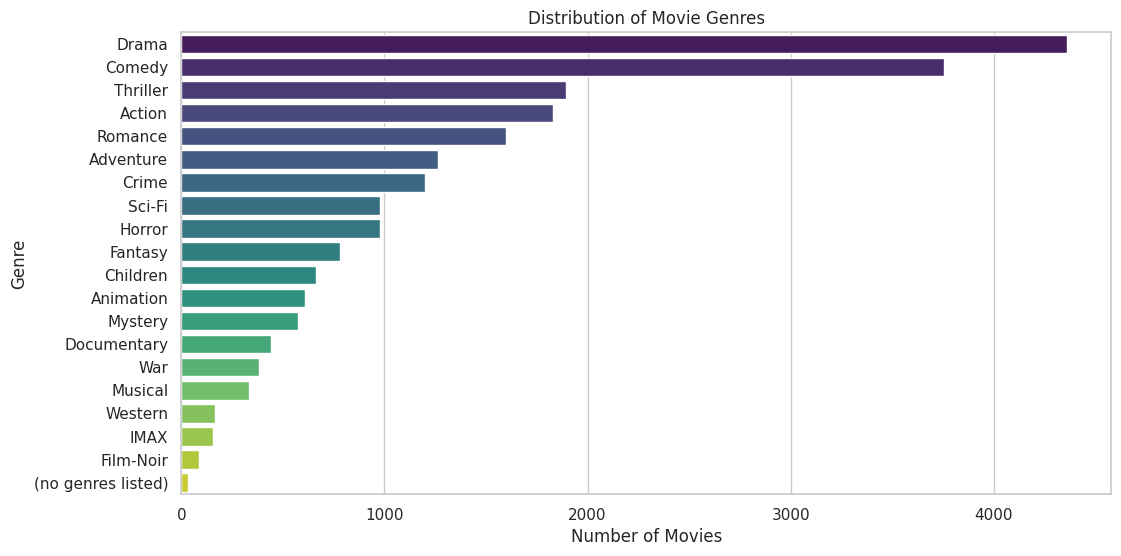

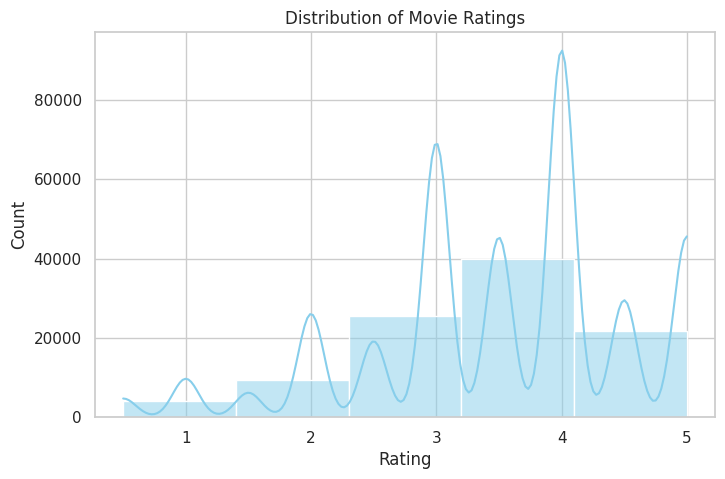

<ipython-input-39-9a0ec15a001a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='plasma')


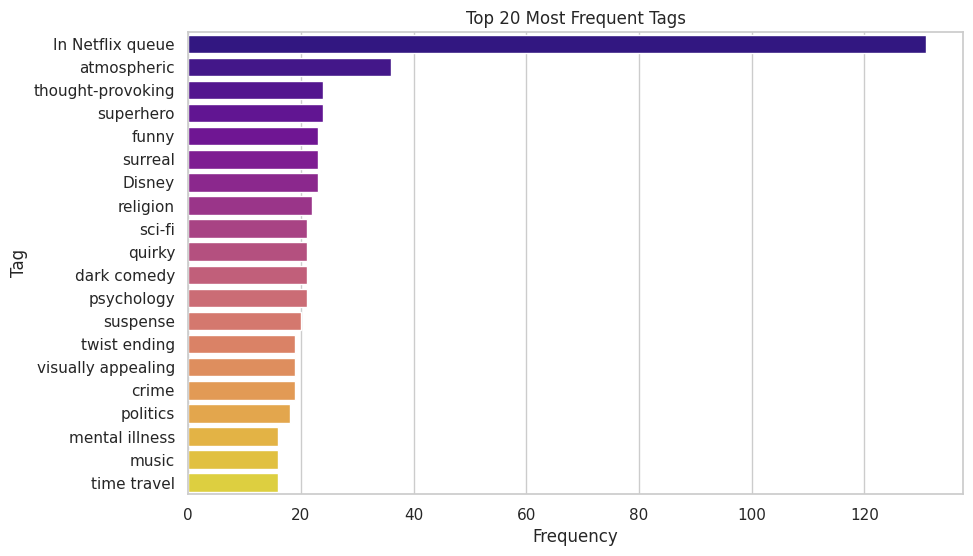

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explore Movie Genres
plt.figure(figsize=(12, 6))
genres_count = movies[genres].sum().sort_values(ascending=False)
sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# 2. Analyze Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=ratings, x='rating', bins=5, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 3. Investigate Tag Frequency
plt.figure(figsize=(10, 6))
tag_counts = tags['tag'].value_counts().head(20)
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='plasma')
plt.title('Top 20 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

# 4. Explore Movie Release Years
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='year', bins=30, kde=True, color='salmon')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Analyze Movie Lengths
plt.figure(figsize=(8, 5))
sns.histplot(data=movies, x='length', bins=30, kde=True, color='orange')
plt.title('Distribution of Movie Lengths')
plt.xlabel('Length (minutes)')
plt.ylabel('Count')
plt.show()


<ipython-input-41-bf3740877fc8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')


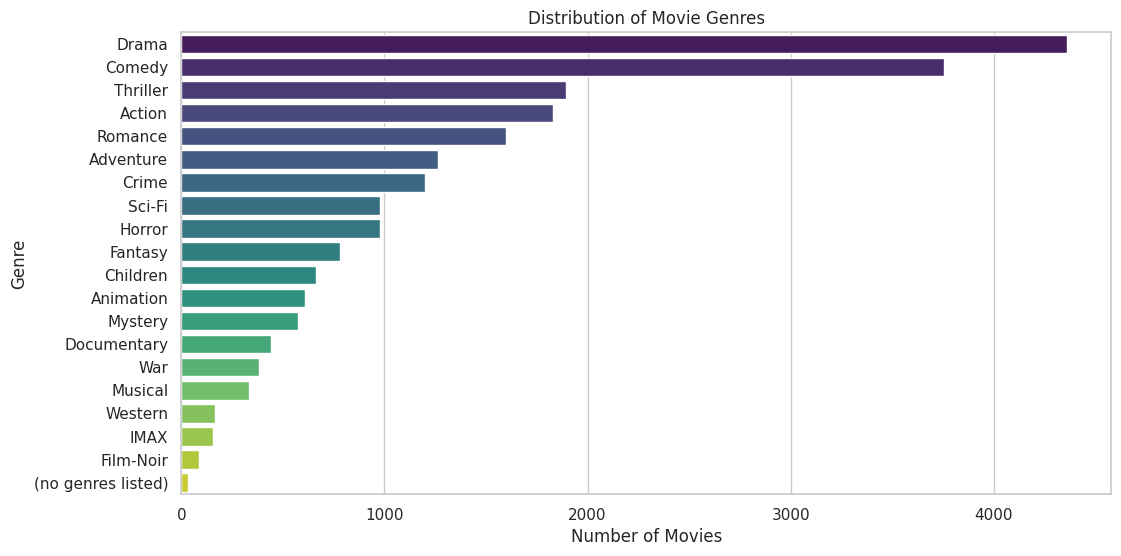

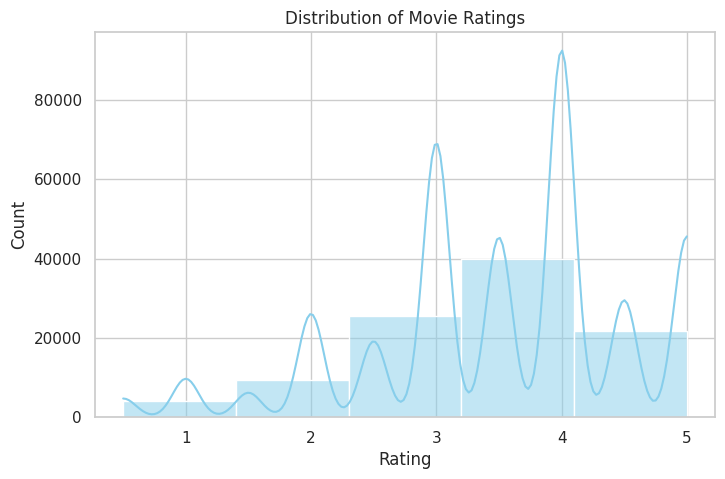

<ipython-input-41-bf3740877fc8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='plasma')


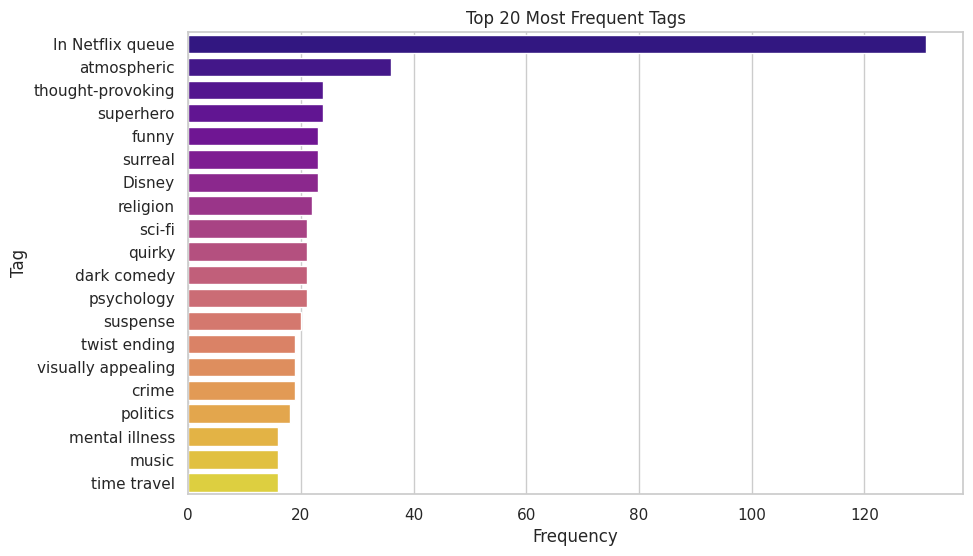

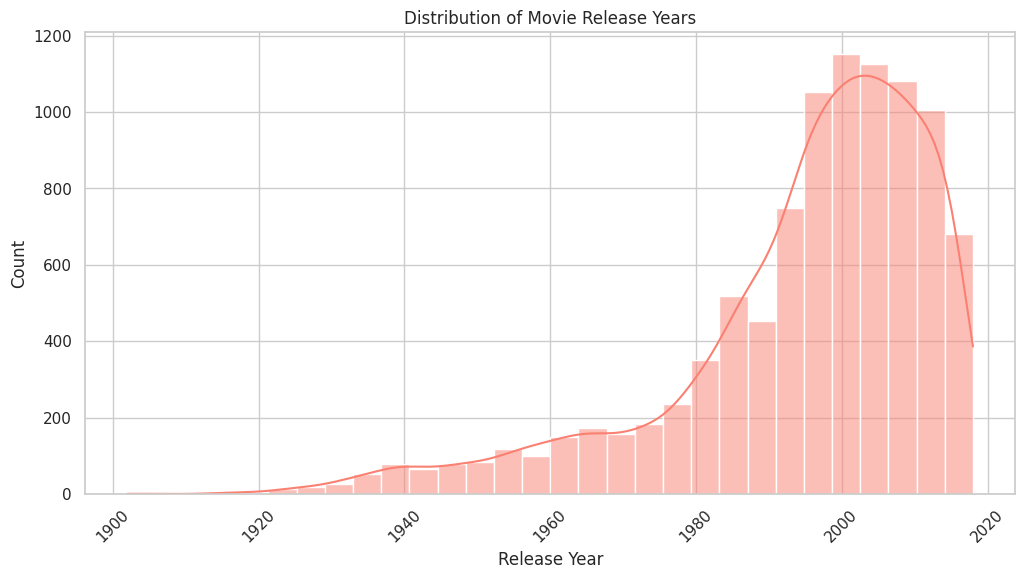

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract release year from the title column
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

# Convert 'year' column to numeric
movies['year'] = pd.to_numeric(movies['year'])

# 1. Explore Movie Genres
plt.figure(figsize=(12, 6))
genres_count = movies[genres].sum().sort_values(ascending=False)
sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# 2. Analyze Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=ratings, x='rating', bins=5, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 3. Investigate Tag Frequency
plt.figure(figsize=(10, 6))
tag_counts = tags['tag'].value_counts().head(20)
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='plasma')
plt.title('Top 20 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

# 4. Explore Movie Release Years
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='year', bins=30, kde=True, color='salmon')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Analyze Movie Lengths
plt.figure(figsize=(8, 5))
sns.histplot(data=movies, x='length', bins=30, kde=True, color='orange')
plt.title('Distribution of Movie Lengths')
plt.xlabel('Length (minutes)')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Load Data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')


movie_tags = pd.merge(movies, tags, on='movieId', how='left')


genres_list = movies['genres'].str.split('|').tolist()
genres = [genre for sublist in genres_list for genre in sublist]
genres = list(set(genres))
for genre in genres:
    movies[genre] = movies['genres'].str.contains(genre).astype(int)


tfidf = TfidfVectorizer(stop_words='english')
tags['tag'] = tags['tag'].fillna('')
tag_matrix = tfidf.fit_transform(tags['tag'])


cosine_sim = linear_kernel(tag_matrix, tag_matrix)


def get_user_recommendations(user_id, cosine_sim=cosine_sim, movies=movies, movie_tags=movie_tags, ratings=ratings, links=links):

    user_watched = ratings[ratings['userId'] == user_id]
    user_watched = user_watched.merge(movies, on='movieId')


    user_tags = movie_tags[movie_tags['movieId'].isin(user_watched['movieId'])]['tag'].unique()


    similar_movies = pd.DataFrame()
    for tag in user_tags:
        similar_movies = pd.concat([similar_movies, movie_tags[movie_tags['tag'] == tag]])


    similar_movies = similar_movies[~similar_movies['movieId'].isin(user_watched['movieId'])]


    similar_movies_count = similar_movies.groupby('movieId').size().reset_index(name='count')

    similar_movies_count = similar_movies_count.sort_values(by='count', ascending=False)

    recommendations = similar_movies_count.merge(movies, on='movieId')
    recommendations = recommendations.merge(links, on='movieId')

    return recommendations.head(10)[['title']]


user_id = 4 # Replace with the desired user ID
user_recommendations = get_user_recommendations(user_id)
print(user_recommendations)


<ipython-input-38-c67cc1a906e5>:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movies[genre] = movies['genres'].str.contains(genre).astype(int)


                                               title
0                                Donnie Darko (2001)
1                                   Inception (2010)
2  Léon: The Professional (a.k.a. The Professiona...
3       Eternal Sunshine of the Spotless Mind (2004)
4                       2001: A Space Odyssey (1968)
5                              Reservoir Dogs (1992)
6                                Mary and Max (2009)
7                                  Eraserhead (1977)
8                                          Pi (1998)
9                                      Aliens (1986)
